In [384]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer


In [284]:
df=pd.read_csv("data.csv", index_col=False)

In [285]:
numerical_cols=['Population',
       'DrugNarcoticOffenses', 'DrugNarcoticViolations',
       'DrugEquipmentViolations', 'GamblingOffenses', 'BettingWagering',
       'OperatingPromotingAssistingGambling', 'GamblingEquipmentViolations',
       'SportsTampering', 'PornographyObsceneMaterial', 'ProstitutionOffenses',
       'Prostitution', 'AssistingorPromotingProstitution',
       'WeaponLawViolations']

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           5235 non-null   int64  
 1   State                                5235 non-null   object 
 2   AgencyType                           5235 non-null   object 
 3   AgencyName                           5235 non-null   object 
 4   Population                           5235 non-null   float64
 5   DrugNarcoticOffenses                 4752 non-null   float64
 6   DrugNarcoticViolations               4724 non-null   float64
 7   DrugEquipmentViolations              3550 non-null   float64
 8   GamblingOffenses                     219 non-null    float64
 9   BettingWagering                      75 non-null     float64
 10  OperatingPromotingAssistingGambling  132 non-null    float64
 11  GamblingEquipmentViolations   

In [287]:
df['WeaponLawViolations'].describe()

count    3689.000000
mean       17.909461
std        73.326599
min         1.000000
25%         2.000000
50%         4.000000
75%        11.000000
max      1982.000000
Name: WeaponLawViolations, dtype: float64

<AxesSubplot:>

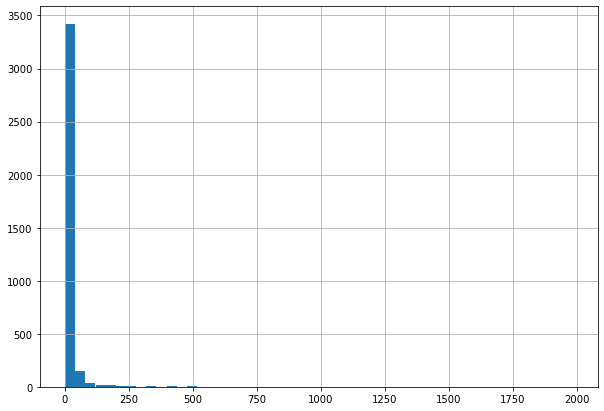

In [288]:
df['WeaponLawViolations'].hist(bins=50)

In [289]:
df.value_counts()

Unnamed: 0  State      AgencyType  AgencyName    Population  DrugNarcoticOffenses  DrugNarcoticViolations  DrugEquipmentViolations  GamblingOffenses  BettingWagering  OperatingPromotingAssistingGambling  GamblingEquipmentViolations  SportsTampering  PornographyObsceneMaterial  ProstitutionOffenses  Prostitution  AssistingorPromotingProstitution  WeaponLawViolations
3869        TENNESSEE  Cities      Murfreesboro  112247.0    14921.0               9592.0                  5329.0                   93.0              10.0             14.0                                 66.0                         3.0              96.0                        901.0                 899.0         2.0                               1061.0                 1
dtype: int64

In [290]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [291]:
null_percentages = df.isnull().sum() / len(df) * 100
null_percentages

State                                   0.000000
AgencyType                              0.000000
AgencyName                              0.000000
Population                              0.000000
DrugNarcoticOffenses                    9.226361
DrugNarcoticViolations                  9.761223
DrugEquipmentViolations                32.187202
GamblingOffenses                       95.816619
BettingWagering                        98.567335
OperatingPromotingAssistingGambling    97.478510
GamblingEquipmentViolations            98.510029
SportsTampering                        99.942693
PornographyObsceneMaterial             69.436485
ProstitutionOffenses                   86.150907
Prostitution                           88.787011
AssistingorPromotingProstitution       93.333333
WeaponLawViolations                    29.531996
dtype: float64

In [292]:
null_percentages=pd.DataFrame(null_percentages)
null_percentages.columns=['percentages of null values']

In [293]:
null_percentages

,percentages of null values
State,0.000000
AgencyType,0.000000
AgencyName,0.000000
Population,0.000000
DrugNarcoticOffenses,9.226361
DrugNarcoticViolations,9.761223
DrugEquipmentViolations,32.187202
GamblingOffenses,95.816619
BettingWagering,98.567335
OperatingPromotingAssistingGambling,97.478510


In [294]:
# null_percentages.sort_values(by='percentages')

In [295]:
df.fillna(0, inplace=True)

In [296]:
null_percentages = df.isnull().sum() / len(df) * 100
null_percentages

State                                  0.0
AgencyType                             0.0
AgencyName                             0.0
Population                             0.0
DrugNarcoticOffenses                   0.0
DrugNarcoticViolations                 0.0
DrugEquipmentViolations                0.0
GamblingOffenses                       0.0
BettingWagering                        0.0
OperatingPromotingAssistingGambling    0.0
GamblingEquipmentViolations            0.0
SportsTampering                        0.0
PornographyObsceneMaterial             0.0
ProstitutionOffenses                   0.0
Prostitution                           0.0
AssistingorPromotingProstitution       0.0
WeaponLawViolations                    0.0
dtype: float64

In [ ]:
df.fillna(0, inplace=True)

In [297]:
df.head()

,State,AgencyType,AgencyName,Population,DrugNarcoticOffenses,DrugNarcoticViolations,DrugEquipmentViolations,GamblingOffenses,BettingWagering,OperatingPromotingAssistingGambling,GamblingEquipmentViolations,SportsTampering,PornographyObsceneMaterial,ProstitutionOffenses,Prostitution,AssistingorPromotingProstitution,WeaponLawViolations
0,ALABAMA,Cities,Hoover,82332.0,308.0,152.0,156.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0
1,ARIZONA,Cities,Apache Junction,36986.0,2069.0,979.0,1090.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0
2,ARIZONA,Cities,Gilbert,214264.0,437.0,208.0,229.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264.0,66.0,44.0,22.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
4,ARKANSAS,Cities,Alma,5439.0,44.0,37.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [298]:
len(df['State'].value_counts())

35

In [299]:
len(df['AgencyName'].value_counts())

3854

In [300]:
df.corr()

,Population,DrugNarcoticOffenses,DrugNarcoticViolations,DrugEquipmentViolations,GamblingOffenses,BettingWagering,OperatingPromotingAssistingGambling,GamblingEquipmentViolations,SportsTampering,PornographyObsceneMaterial,ProstitutionOffenses,Prostitution,AssistingorPromotingProstitution,WeaponLawViolations
Population,1.000000,0.040179,0.035173,0.045768,0.022609,0.010842,0.009088,0.031524,0.031735,0.025415,0.024532,0.028088,-0.006130,0.015703
DrugNarcoticOffenses,0.040179,1.000000,0.981365,0.907825,0.645405,0.437563,0.505552,0.573657,0.511656,0.666696,0.735474,0.711251,0.293332,0.765600
DrugNarcoticViolations,0.035173,0.981365,1.000000,0.810330,0.654936,0.481167,0.510956,0.532860,0.464096,0.665081,0.739558,0.706629,0.326219,0.815229
DrugEquipmentViolations,0.045768,0.907825,0.810330,1.000000,0.538869,0.284277,0.426600,0.586484,0.547479,0.581656,0.628859,0.626855,0.182592,0.555587
GamblingOffenses,0.022609,0.645405,0.654936,0.538869,1.000000,0.845619,0.826685,0.633037,0.521597,0.411720,0.593196,0.607452,0.113358,0.596619
BettingWagering,0.010842,0.437563,0.481167,0.284277,0.845619,1.000000,0.662411,0.166961,0.110111,0.281278,0.366693,0.364739,0.109335,0.577087
OperatingPromotingAssistingGambling,0.009088,0.505552,0.510956,0.426600,0.826685,0.662411,1.000000,0.375135,0.289678,0.358176,0.388204,0.380815,0.135150,0.485212
GamblingEquipmentViolations,0.031524,0.573657,0.532860,0.586484,0.633037,0.166961,0.375135,1.000000,0.863244,0.340345,0.624474,0.664555,0.027905,0.283367
SportsTampering,0.031735,0.511656,0.464096,0.547479,0.521597,0.110111,0.289678,0.863244,1.000000,0.309321,0.546409,0.587269,0.003304,0.218248
PornographyObsceneMaterial,0.025415,0.666696,0.665081,0.581656,0.411720,0.281278,0.358176,0.340345,0.309321,1.000000,0.485888,0.466521,0.206055,0.519304


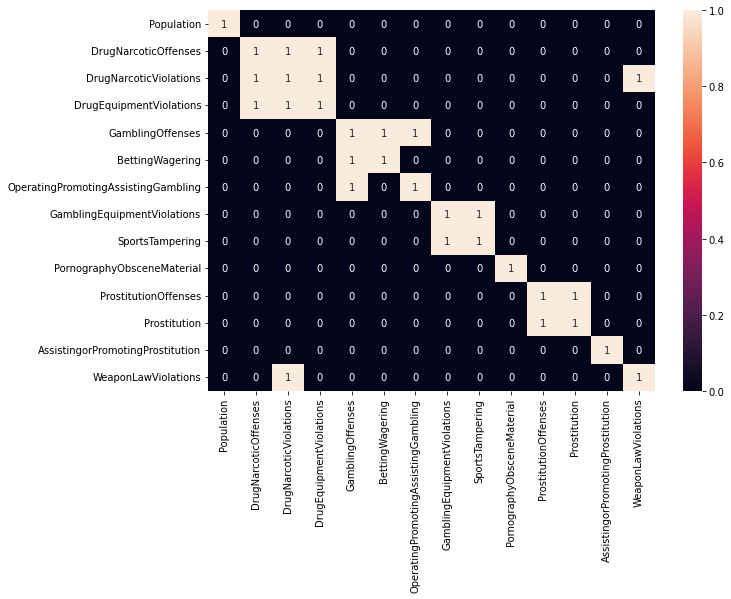

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
cor_matrix = df.corr() #calculate the correlation matrix of the dataframe

plt.rcParams['figure.figsize'] = (10,7)
sns.heatmap(cor_matrix.abs()>0.8,annot=True) #heat map of correlation matrix
plt.show()

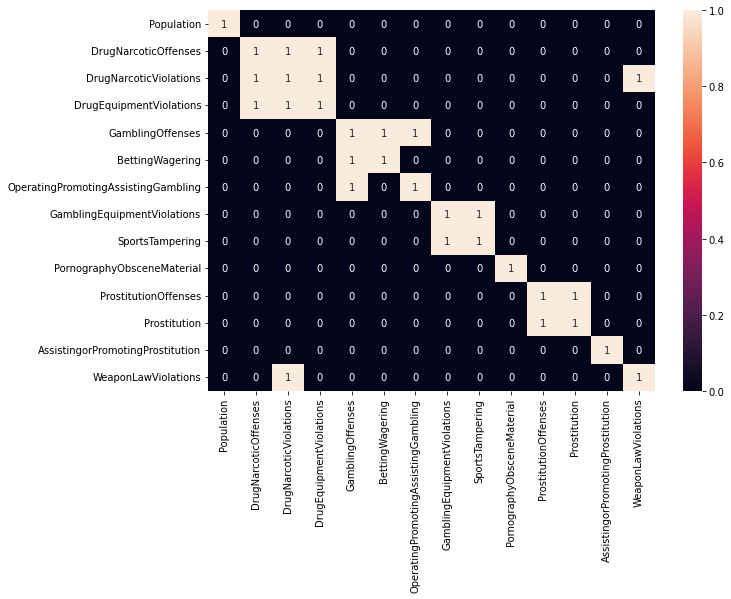

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cor_matrix = df.corr() #calculate the correlation matrix of the dataframe

plt.rcParams['figure.figsize'] = (10,7)
sns.heatmap(cor_matrix.abs()>0.8,annot=True) #heat map of correlation matrix
plt.show()

In [302]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['State']= label_encoder.fit_transform(df['State'])
df['State'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [303]:
label_encoder = preprocessing.LabelEncoder()
df['AgencyType']= label_encoder.fit_transform(df['AgencyType'])
df['AgencyType'].unique()

array([0, 1, 6, 2, 3, 5, 4])

In [304]:
label_encoder = preprocessing.LabelEncoder()
df['AgencyName']= label_encoder.fit_transform(df['AgencyName'])
df['AgencyName'].unique()

array([1613,  106, 1308, ..., 3544, 2544, 3219])

# Train Test Split

In [305]:
X=df

In [306]:
# X.drop(['DrugNarcoticOffenses','Prostitution','DrugNarcoticViolations', 'GamblingOffenses', 'ProstitutionOffenses'], axis=1, inplace = True)

In [307]:
target=pd.read_csv('target.csv')

In [308]:
y=target['TotalOffences']

In [309]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

# Scores Generator

In [396]:
def score_generator(model, name='not-specified', type='train', std=False):
    x_trains=x_train
    x_tests=x_test
    if(std==True):
        scaler = StandardScaler()
        X_std = scaler.fit_transform(x_train)
        X_std_test = scaler.fit_transform(x_test)
        x_trains=X_std
        x_tests=X_std_test
    if (type == 'train'):
        y_pred = model.predict(x_trains)
        y_true = y_train
    elif (type == 'test'):
        y_pred = model.predict(x_tests)
        y_true = y_test
    

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    metrics_dict = {
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'R-squared (R2)': r2
    }

    return metrics_dict


# Linear Model

In [311]:
param_grid = {
    "fit_intercept": [True, False],
}

regressor = LinearRegression()

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    regressor, param_grid=param_grid, cv=5, scoring=scoring
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'fit_intercept': True}
Best score: 3864684.7791024074


In [312]:
score_generator(grid_search.best_estimator_, 'Linear Regressor', 'train')

{'Mean Absolute Error (MAE)': 425.0036584453384,
 'Mean Squared Error (MSE)': 1614614.4943821419,
 'Root Mean Squared Error (RMSE)': 1270.6748185047745,
 'R-squared (R2)': 0.8926223170156363}

In [314]:
score_generator(grid_search.best_estimator_, 'Linear Regressor', 'test')

{'Mean Absolute Error (MAE)': 394.594916007881,
 'Mean Squared Error (MSE)': 2362052.2242556973,
 'Root Mean Squared Error (RMSE)': 1536.8969465308003,
 'R-squared (R2)': 0.7900349371183578}

# Lasso Regression

In [387]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define the Lasso regression model
lasso = Lasso()

# Define the hyperparameters for grid search
param_grid = {
    "alpha": [0.1, 1, 10],
    "tol": [0.0001, 0.001, 0.01]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)
grid_search.fit(X_std, y)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e+08, tolerance: 6.362e+06
  model = cd_fast.enet_coordinate_descent(
e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.030e+06, tolerance: 6.421e+06
  model = cd_fast.enet_coordinate_descent(
e:\anaconda3\envs\mohit_chodisetti\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

Best hyperparameters: {'alpha': 10, 'tol': 0.01}
Best score: 0.8051811835361835


In [392]:
score_generator(grid_search.best_estimator_, 'Lasso', 'train', std=True)

{'Mean Absolute Error (MAE)': 411.06278441813356,
 'Mean Squared Error (MSE)': 1692777.1093647236,
 'Root Mean Squared Error (RMSE)': 1301.0676805472972,
 'R-squared (R2)': 0.8874242214194239}

In [397]:
score_generator(grid_search.best_estimator_, 'Lasso', 'test', std=True)

{'Mean Absolute Error (MAE)': 408.2948314211231,
 'Mean Squared Error (MSE)': 1752371.6990653689,
 'Root Mean Squared Error (RMSE)': 1323.771770006208,
 'R-squared (R2)': 0.8442300173518771}

# Decision Tree Regressor

In [326]:
param_grid = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

regressor = DecisionTreeRegressor()

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    regressor, param_grid=param_grid, cv=5, scoring=scoring
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 4713706.241348198


In [327]:
score_generator(grid_search.best_estimator_, 'Decision Tree', 'train')

{'Mean Absolute Error (MAE)': 364.5604861917656,
 'Mean Squared Error (MSE)': 1023726.4083266873,
 'Root Mean Squared Error (RMSE)': 1011.7936589674237,
 'R-squared (R2)': 0.9319185043126416}

In [328]:
score_generator(grid_search.best_estimator_, 'Decision Tree', 'test')

{'Mean Absolute Error (MAE)': 425.98274990246586,
 'Mean Squared Error (MSE)': 5420882.521187987,
 'Root Mean Squared Error (RMSE)': 2328.2788753042423,
 'R-squared (R2)': 0.5181326103854941}

# Random Forest

In [332]:
param_grid = {
    "n_estimators": [2,100],
    "max_depth": [5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

regressor = RandomForestRegressor()

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    regressor, param_grid=param_grid, cv=5, scoring=scoring
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 3037642.367734476


In [333]:
score_generator(grid_search.best_estimator_, 'Random Forest', 'train')

{'Mean Absolute Error (MAE)': 326.7786572144915,
 'Mean Squared Error (MSE)': 812872.1494044142,
 'Root Mean Squared Error (RMSE)': 901.5942265811235,
 'R-squared (R2)': 0.9459410724545947}

In [334]:
score_generator(grid_search.best_estimator_, 'Random Forest', 'test')

{'Mean Absolute Error (MAE)': 323.28422505839313,
 'Mean Squared Error (MSE)': 1433637.6482989786,
 'Root Mean Squared Error (RMSE)': 1197.3460854318514,
 'R-squared (R2)': 0.8725625894789704}

# Gradient Boosting Regressor

In [358]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    "n_estimators": [2,150],
    "max_depth": [5, 10],
    "learning_rate": [0.1, 0.01],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

regressor = GradientBoostingRegressor()

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = RandomizedSearchCV(regressor, 
                                 param_distributions = param_grid, 
                                 n_iter=5, 
                                 cv=5,
                                 scoring=scoring)


grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'learning_rate': 0.1}
Best score: 5646819.77292596


In [370]:
score_generator(grid_search.best_estimator_, 'Gradient Boosting', 'train')

{'Mean Absolute Error (MAE)': 57.0212954474427,
 'Mean Squared Error (MSE)': 7668.666555264633,
 'Root Mean Squared Error (RMSE)': 87.57092300110027,
 'R-squared (R2)': 0.9994900060360234}

In [350]:
score_generator(grid_search.best_estimator_, 'Gradient Boosting', 'test')

{'Mean Absolute Error (MAE)': 161.04601903488867,
 'Mean Squared Error (MSE)': 79551.68165228437,
 'Root Mean Squared Error (RMSE)': 282.04907667334135,
 'R-squared (R2)': 0.9929285755543675}